In [7]:
import pandas as pd
df = pd.read_csv('/home/sarang/Desktop/AML-pro-assignment/car_updated_dataset.csv',index_col=0)
df.reset_index(inplace=True)
df.head()

,index,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
3,4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False
4,5,6,maruti alto k10,2018,petrol,23534,335299,noida,1055,hatchback,...,1,343212,439056.0,great,2021-04-13T05:55:16.99,True,7788,50295,False,False


In [8]:
df.shape

(5790, 31)

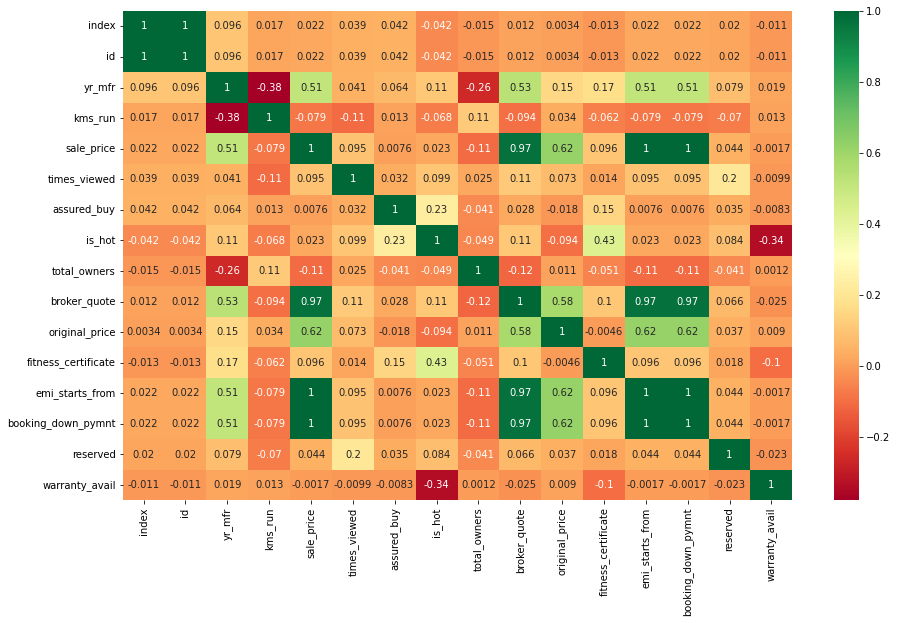

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
dataplot = sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)
plt.show()  

From above heatmap, **['yr_mfr','broker_qoute','original_price','emi_starts_from','booking_down_pymnt']** have strong correlation with target variable...whereas **['times_viewed','fitness_certificate]** have low correlation but can be considered in X.

In [5]:
obj_columns = list(df.select_dtypes(include='object'))
obj_columns

['car_name',
 'fuel_type',
 'city',
 'body_type',
 'transmission',
 'variant',
 'registered_city',
 'registered_state',
 'rto',
 'source',
 'make',
 'model',
 'car_availability',
 'car_rating',
 'ad_created_on']

In [15]:
x = df.drop(columns=['registered_state','index','id','ad_created_on','model','times_viewed','fitness_certificate','reserved','warranty_avail','sale_price'],axis=1)

In [16]:
y = df['sale_price']

In [17]:
print("x shape: ",x.shape)
print("y shape: ",y.shape)

x shape:  (5790, 21)
y shape:  (5790,)


In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            5790 non-null   object 
 1   yr_mfr              5790 non-null   int64  
 2   fuel_type           5790 non-null   object 
 3   kms_run             5790 non-null   int64  
 4   city                5790 non-null   object 
 5   body_type           5790 non-null   object 
 6   transmission        5790 non-null   object 
 7   variant             5790 non-null   object 
 8   assured_buy         5790 non-null   bool   
 9   registered_city     5790 non-null   object 
 10  is_hot              5790 non-null   bool   
 11  rto                 5790 non-null   object 
 12  source              5790 non-null   object 
 13  make                5790 non-null   object 
 14  car_availability    5790 non-null   object 
 15  total_owners        5790 non-null   int64  
 16  broker

In [19]:
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()
# transforming the column after fitting
for obj in obj_columns:
    df[obj]= Targetenc.fit_transform(df[obj],y= df['sale_price'])
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            5790 non-null   float64
 1   yr_mfr              5790 non-null   int64  
 2   fuel_type           5790 non-null   float64
 3   kms_run             5790 non-null   int64  
 4   city                5790 non-null   float64
 5   body_type           5790 non-null   float64
 6   transmission        5790 non-null   float64
 7   variant             5790 non-null   float64
 8   assured_buy         5790 non-null   bool   
 9   registered_city     5790 non-null   float64
 10  is_hot              5790 non-null   bool   
 11  rto                 5790 non-null   float64
 12  source              5790 non-null   float64
 13  make                5790 non-null   float64
 14  car_availability    5790 non-null   float64
 15  total_owners        5790 non-null   int64  
 16  broker

-------------------------------------------------------------------------------------X------------------------------------------------------------------------------------

Implementing Linear regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=52)

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)
linear_pred = model1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
r2 = r2_score(y_test,linear_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,linear_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,linear_pred),3))
mse = mean_squared_error(y_test,linear_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(model1,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

Implementing Standardization of LinearRegression

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=52)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_train_linear = scale.fit_transform(x_train)
x_test_linear = scale.transform(x_test)

In [ ]:
model1 = LinearRegression()
model1.fit(x_train_linear,y_train)
linear_pred = model1.predict(x_test_linear)

In [ ]:
r2 = r2_score(y_test,linear_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,linear_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,linear_pred),3))
mse = mean_squared_error(y_test,linear_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

Implementing PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=52)

In [ ]:
x_train_linear = scale.fit_transform(x_train)
x_test_linear = scale.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train_linear)
pca_test = pca.transform(x_test_linear)

In [ ]:
model1 = LinearRegression()
model1.fit(pca_train,y_train)
linear_pred = model1.predict(pca_test)

In [ ]:
r2 = r2_score(y_test,linear_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,linear_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,linear_pred),3))
mse = mean_squared_error(y_test,linear_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

-------------------------------------------------------------------------------------X------------------------------------------------------------------------------------

Implementing SVM

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,train_size=0.8)

In [ ]:
x_train_svr = scale.fit_transform(x_train)
x_test_svr = scale.transform(x_test)

In [ ]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train_svr, y_train)
svr_pred = regressor.predict(x_test_svr)

In [ ]:
r2 = r2_score(y_test,svr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,svr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,svr_pred),3))
mse = mean_squared_error(y_test,svr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(regressor,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

-------------------------------------------------------------------------------------X------------------------------------------------------------------------------------

Implementing RandomForest 

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.4)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rfr_pred = rf.predict(x_test)

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
r2 = r2_score(y_test,rfr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,rfr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,rfr_pred),3))
mse = mean_squared_error(y_test,rfr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(rf,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

R2 score:  0.999
Adjusted R2_score:  0.999
MAE:  1026.749
MSE:  94700019.992
RMSE:  9731.394


Implementing Standardization of RandomForest

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.4)

In [ ]:
x_train_rf = scale.fit_transform(x_train)
x_test_rf = scale.transform(x_test)

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train_rf,y_train)
rfr_pred = rf.predict(x_test_rf)

In [ ]:
r2 = r2_score(y_test,rfr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,rfr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,rfr_pred),3))
mse = mean_squared_error(y_test,rfr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

Implementing PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.4)

In [ ]:
x_train_rf = scale.fit_transform(x_train)
x_test_rf = scale.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train_rf)
pca_test = pca.transform(x_test_rf)

In [ ]:
rf = RandomForestRegressor()
rf.fit(pca_train,y_train)
rfr_pred = rf.predict(pca_test)

In [ ]:
r2 = r2_score(y_test,rfr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,rfr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,rfr_pred),3))
mse = mean_squared_error(y_test,rfr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

-------------------------------------------------------------------------------------X------------------------------------------------------------------------------------

Implementing DecisionTree

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
decision = DecisionTreeRegressor() 
decision.fit(x_train, y_train)
dtr_pred = decision.predict(x_test)

In [ ]:
r2 = r2_score(y_test,dtr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,dtr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,dtr_pred),3))
mse = mean_squared_error(y_test,dtr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(decision,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

Implementing Standardization of DecisionTree

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.2)

In [ ]:
x_train_dt = scale.fit_transform(x_train)
x_test_dt = scale.transform(x_test)

In [ ]:
decision = DecisionTreeRegressor() 
decision.fit(x_train_dt, y_train)
dtr_pred = decision.predict(x_test_dt)

In [ ]:
r2 = r2_score(y_test,dtr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,dtr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,dtr_pred),3))
mse = mean_squared_error(y_test,dtr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

Implementing PCA

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.2)

In [ ]:
x_train_dt = scale.fit_transform(x_train)
x_test_dt = scale.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train_dt)
pca_test = pca.transform(x_test_dt)

In [ ]:
decision = DecisionTreeRegressor() 
decision.fit(pca_train, y_train)
dtr_pred = decision.predict(pca_test)

-------------------------------------------------------------------------------------X------------------------------------------------------------------------------------

Implementing Lasso Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,train_size=0.8)

In [ ]:
from sklearn import linear_model
lassoReg = linear_model.Lasso()
lassoReg.fit(x_train,y_train)
lr_pred = lassoReg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
r2 = r2_score(y_test,lr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,lr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,lr_pred),3))
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(lassoReg,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

Implementing Standardization of LassoRegression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,train_size=0.8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_train_lasso = scale.fit_transform(x_train)
x_test_lasso = scale.transform(x_test)

In [ ]:
from sklearn import linear_model
lassoReg = linear_model.Lasso()
lassoReg.fit(x_train_lasso,y_train)
lr_pred = lassoReg.predict(x_test_lasso)

In [ ]:
r2 = r2_score(y_test,lr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,lr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,lr_pred),3))
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

Implementing PCA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,train_size=0.8)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_train_lasso = scale.fit_transform(x_train)
x_test_lasso = scale.transform(x_test)

In [ ]:
pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train_lasso)
pca_test = pca.transform(x_test_lasso)

In [ ]:
lassoReg = linear_model.Lasso()
lassoReg.fit(pca_train,y_train)
lr_pred = lassoReg.predict(pca_test)

In [ ]:
r2 = r2_score(y_test,lr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,lr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,lr_pred),3))
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

-------------------------------------------------------------------------------------X------------------------------------------------------------------------------------